# Students dropout Prediction by using Machine Learning Algorithm

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **data loading**

In [2]:
df = pd.read_csv('dataset.csv')
#view the data
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# finding null# 

In [3]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

# finding duplicates

In [4]:
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

# statistical summary

In [6]:
from pandas.io.formats.format import set_option
set_option('display.precision',2)
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,...,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4.42e+03
mean,1.18,6.89,1.73,9.90,0.89,2.53,1.25,12.32,16.46,7.32,...,0.14,0.54,6.23,8.06,4.44,10.23,0.15,11.57,1.23,1.97e-03
std,0.61,5.30,1.31,4.33,0.31,3.96,1.75,9.03,11.04,4.00,...,0.69,1.92,2.20,3.95,3.01,5.21,0.75,2.66,1.38,2.27e+00
min,1.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06e+00
25%,1.00,1.00,1.00,6.00,1.00,1.00,1.00,2.00,3.00,5.00,...,0.00,0.00,5.00,6.00,2.00,10.75,0.00,9.40,0.30,-1.70e+00
50%,1.00,8.00,1.00,10.00,1.00,1.00,1.00,13.00,14.00,6.00,...,0.00,0.00,6.00,8.00,5.00,12.20,0.00,11.10,1.40,3.20e-01
75%,1.00,12.00,2.00,13.00,1.00,1.00,1.00,22.00,27.00,10.00,...,0.00,0.00,7.00,10.00,6.00,13.33,0.00,13.90,2.60,1.79e+00
max,6.00,18.00,9.00,17.00,1.00,17.00,21.00,29.00,34.00,32.00,...,12.00,19.00,23.00,33.00,20.00,18.57,12.00,16.20,3.70,3.51e+00


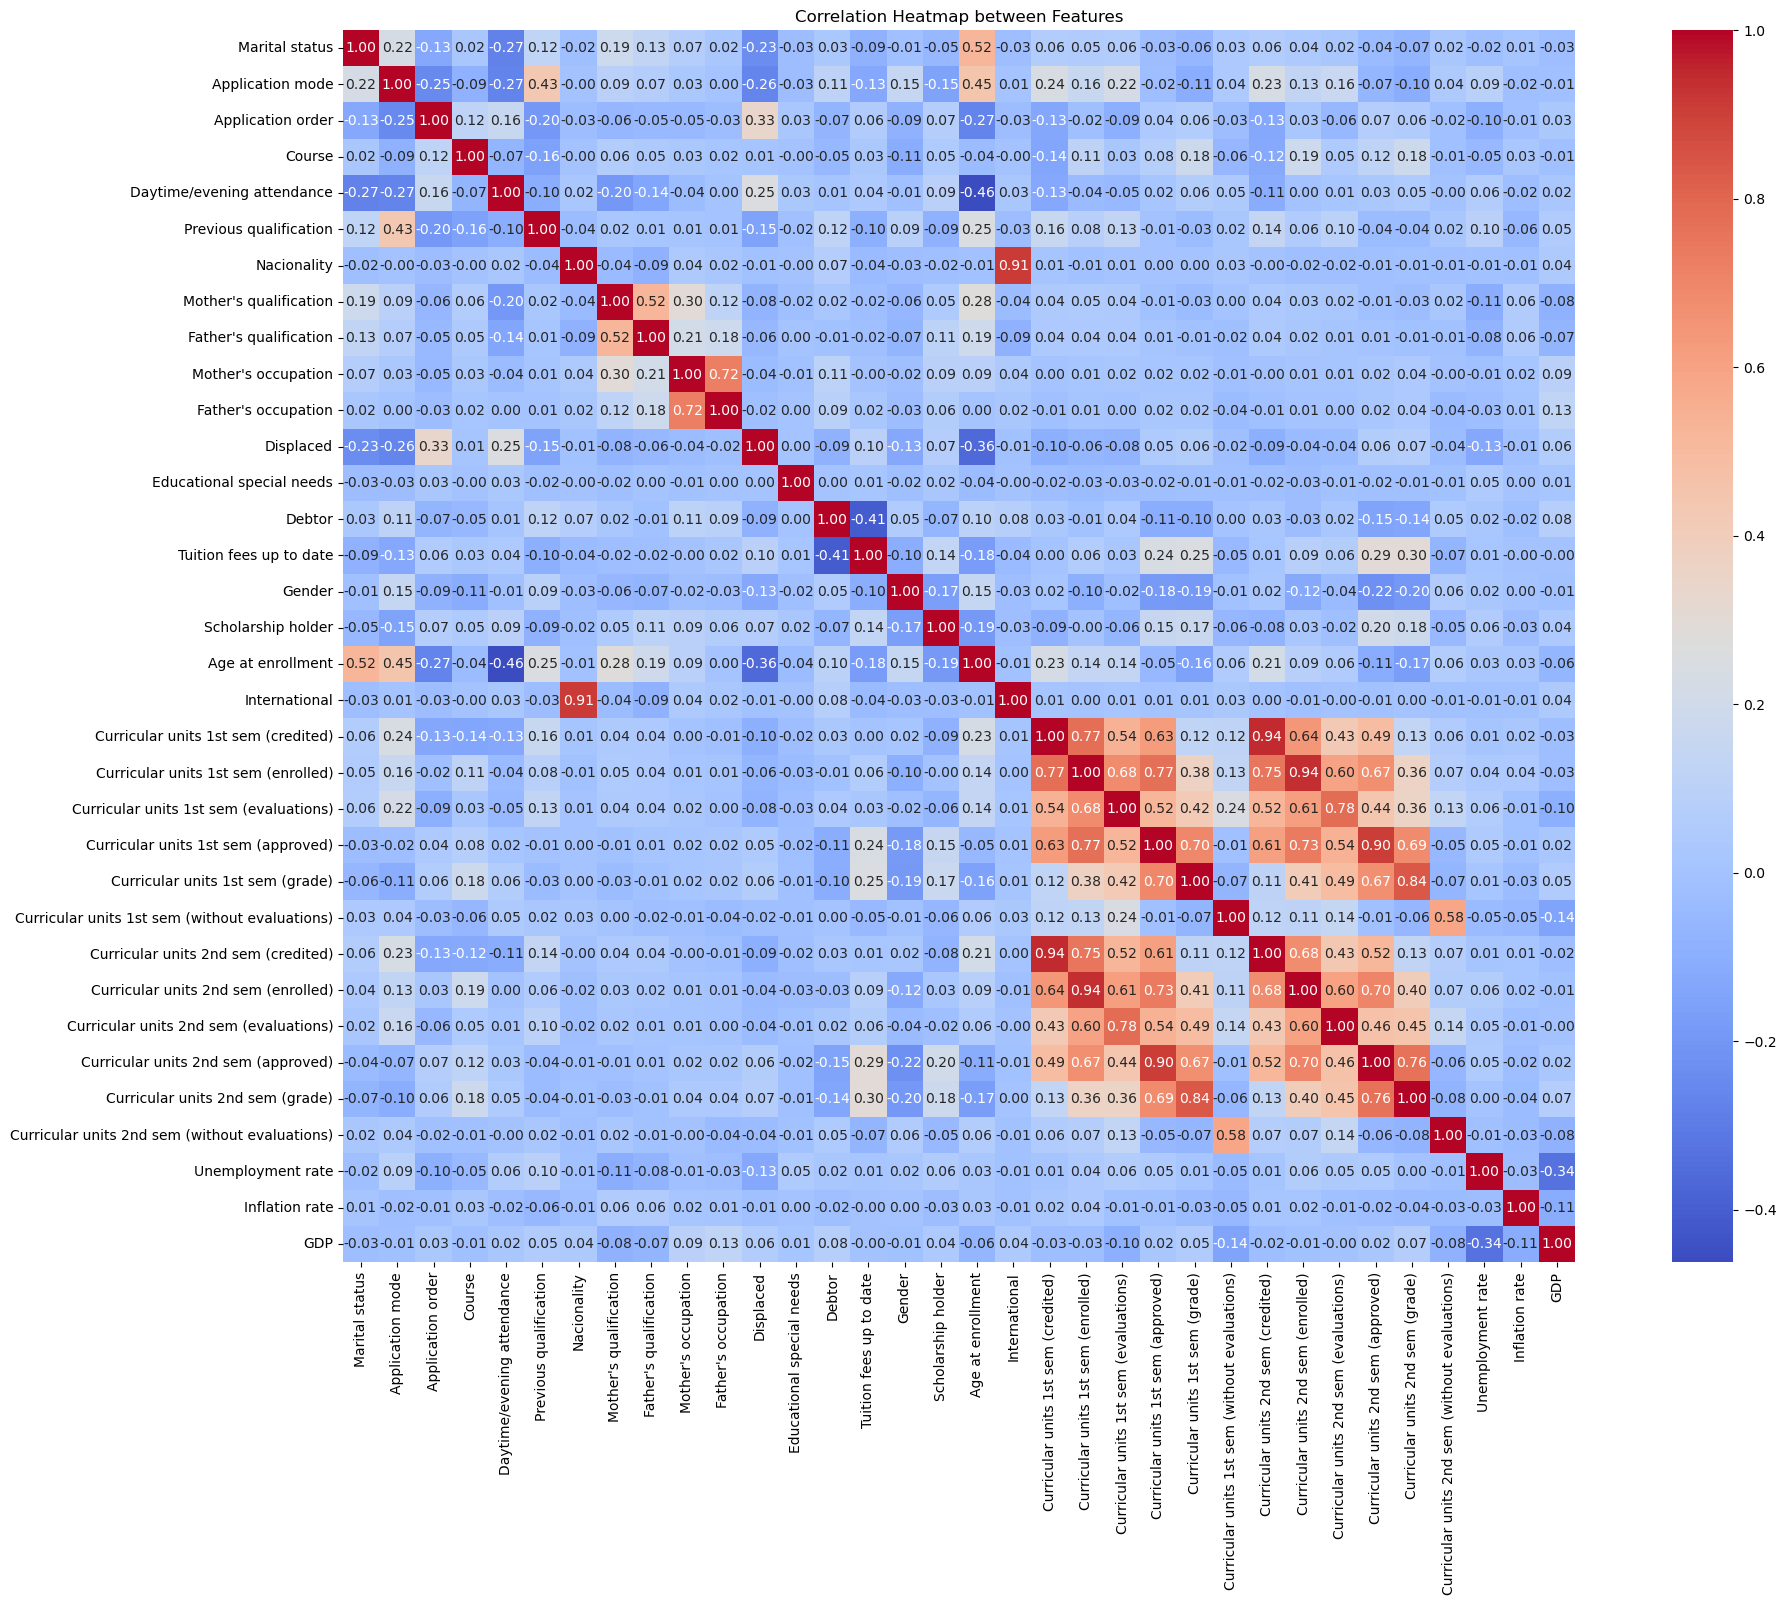

In [10]:
# # finding correlations between attributes
# # Computing the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(25, 16))

# Draw the heatmap with annotations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Set plot title and display
plt.title("Correlation Heatmap between Features")
plt.show()



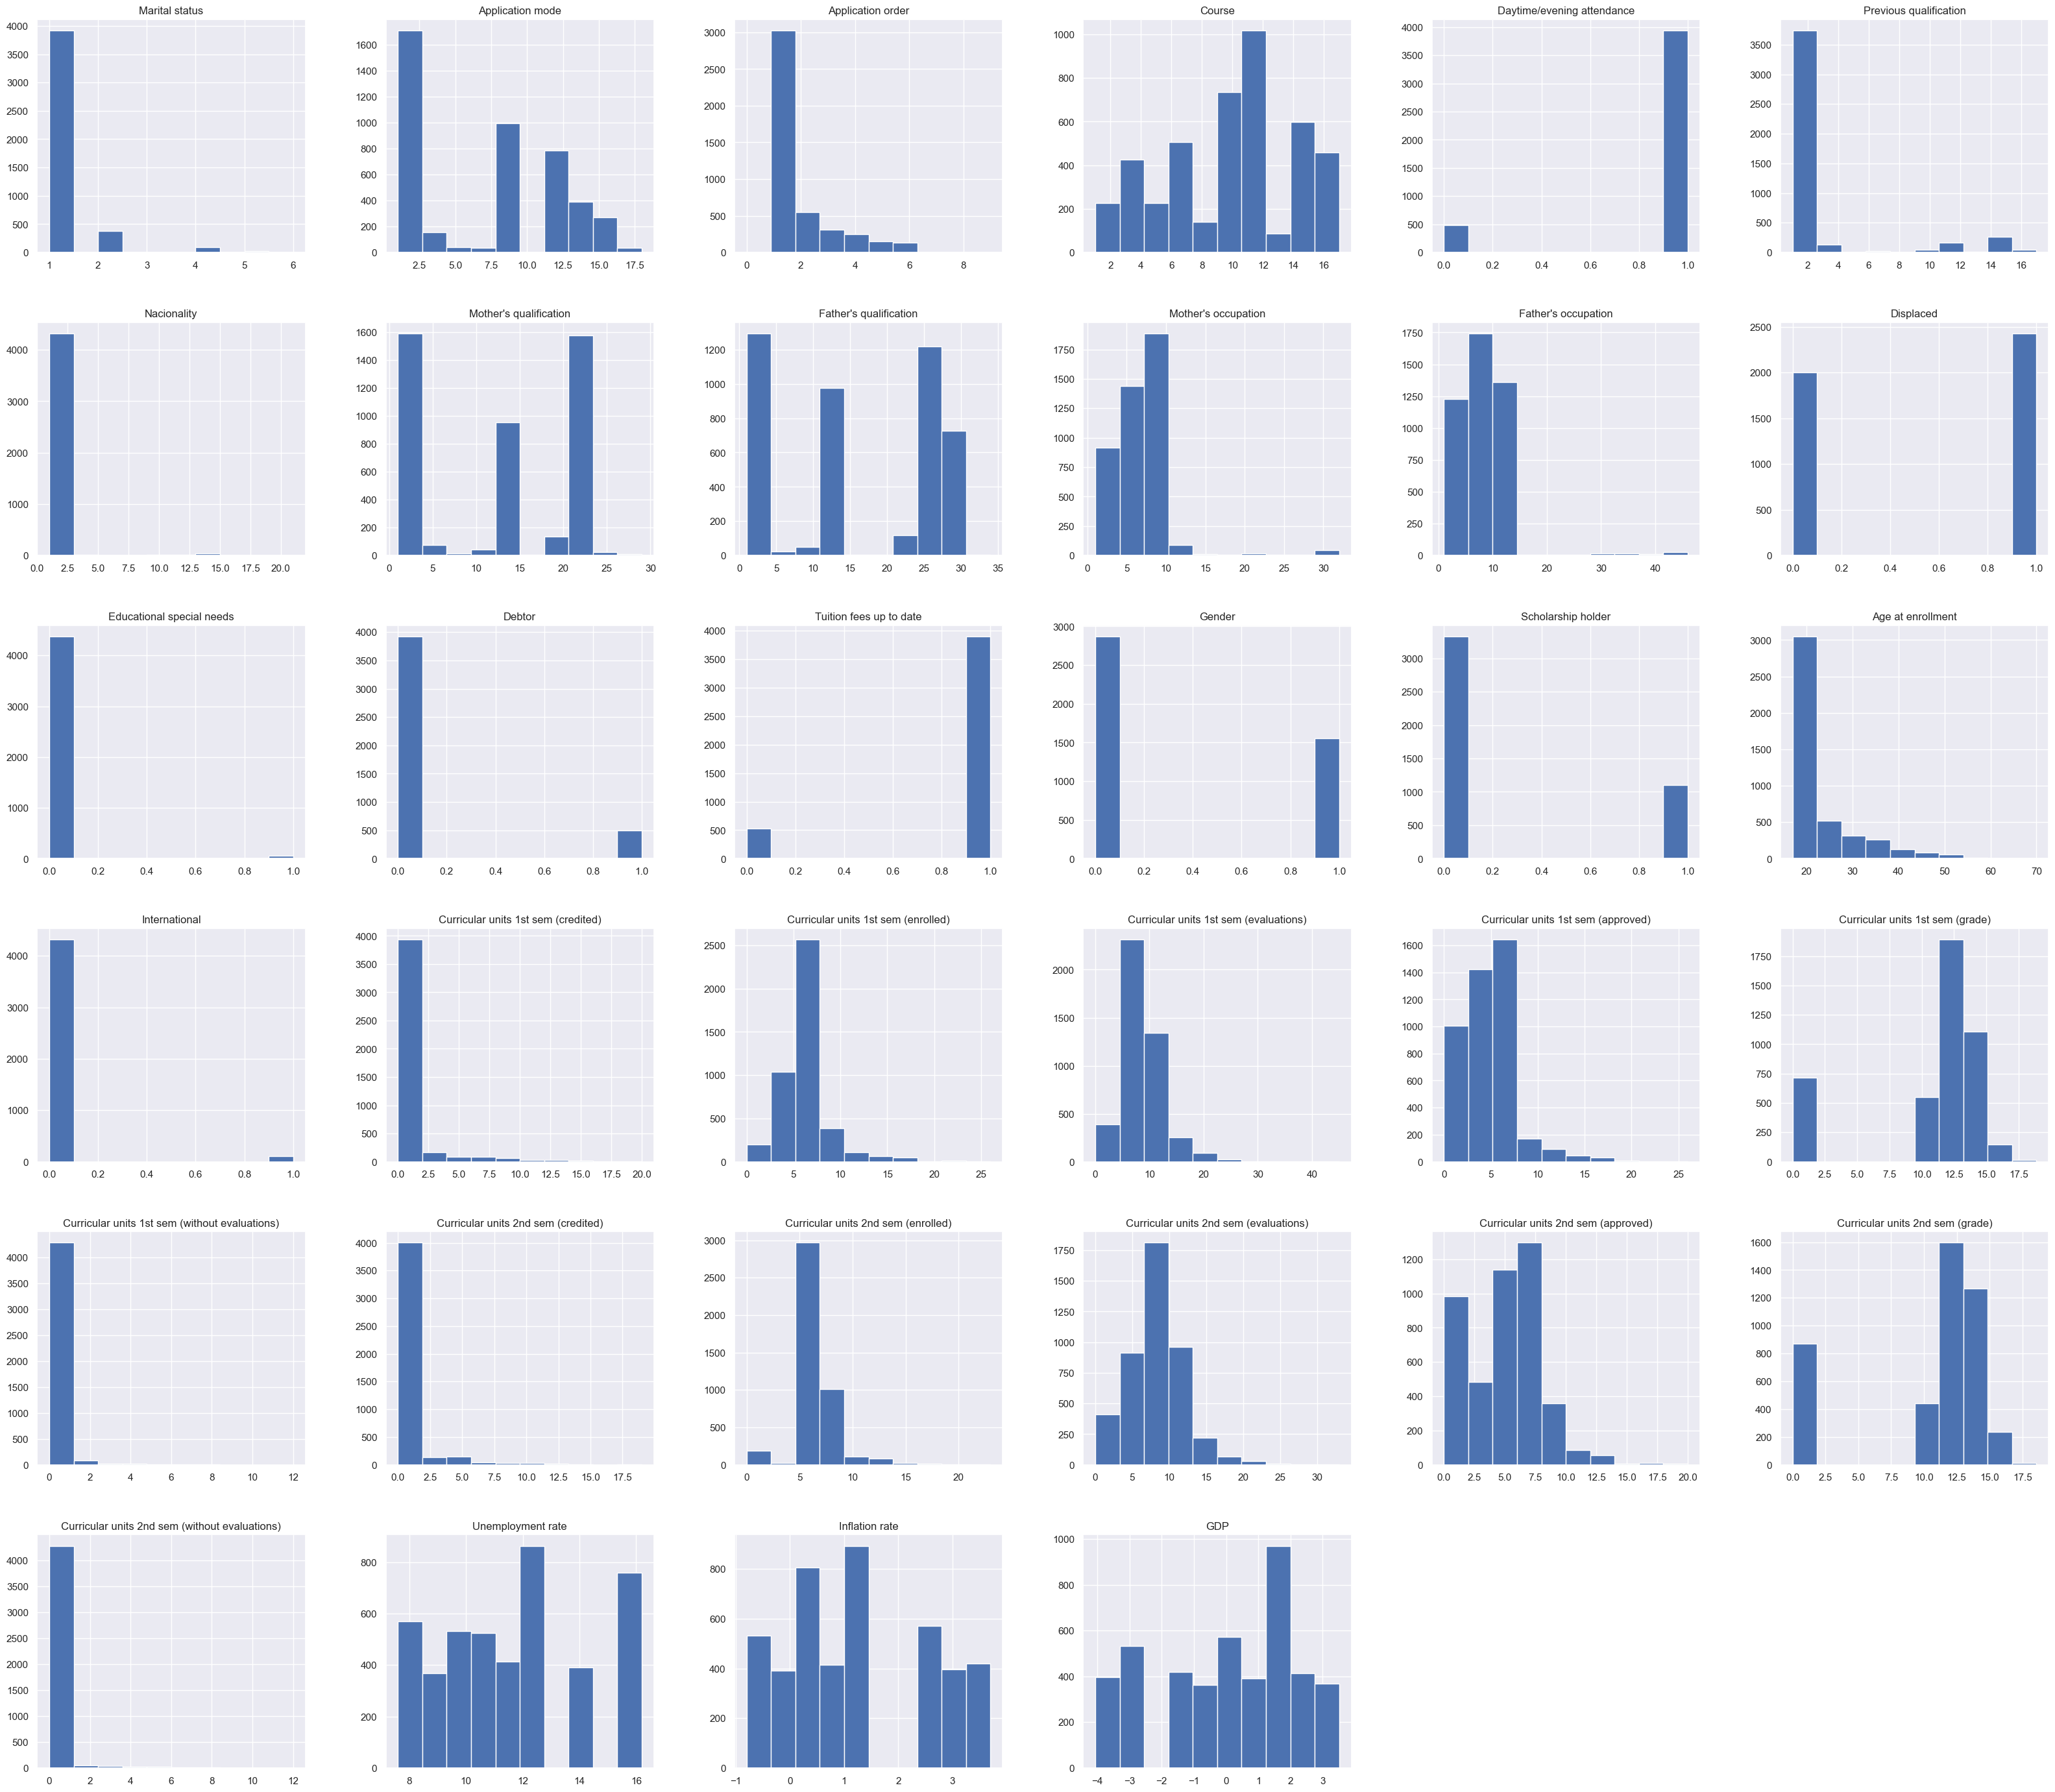

In [11]:

##histogram - visual representation
sns.set_theme(style = 'darkgrid')
df.hist(bins=10, figsize=(40, 35), grid=True, legend=None);

In [12]:

df.describe(include='all').loc['unique', :]
     

Marital status                                    NaN
Application mode                                  NaN
Application order                                 NaN
Course                                            NaN
Daytime/evening attendance                        NaN
Previous qualification                            NaN
Nacionality                                       NaN
Mother's qualification                            NaN
Father's qualification                            NaN
Mother's occupation                               NaN
Father's occupation                               NaN
Displaced                                         NaN
Educational special needs                         NaN
Debtor                                            NaN
Tuition fees up to date                           NaN
Gender                                            NaN
Scholarship holder                                NaN
Age at enrollment                                 NaN
International               

# Genderwise no of students counting

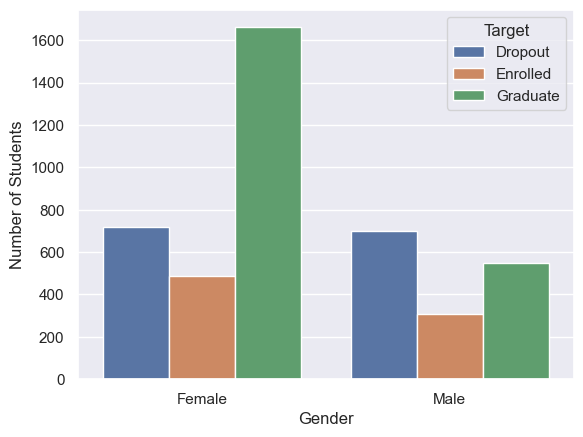

In [13]:
sns.countplot(data=df, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

In [14]:
s_df=df.copy()
s_df.shape

(4424, 35)

In [18]:
df['Marital status'].unique()

array([1, 2, 4, 3, 5, 6], dtype=int64)

In [19]:
df.loc[:,'Application mode'].value_counts()

1     1708
8      872
12     785
14     312
15     213
4      139
9      124
13      77
16      59
7       38
17      35
6       30
3       16
5       10
2        3
18       1
10       1
11       1
Name: Application mode, dtype: int64

In [46]:
df.loc[:,"Father's qualification"].value_counts()

27    1209
14     968
1      904
28     702
3      282
24     112
2       68
4       39
10      38
29      20
5       18
9       10
26       8
7        5
30       5
16       4
21       4
12       4
20       3
25       2
31       2
33       2
8        2
6        2
18       2
17       1
19       1
23       1
34       1
15       1
32       1
13       1
11       1
22       1
Name: Father's qualification, dtype: int64

In [48]:

df.loc[:,'Curricular units 1st sem (credited)'].value_counts()

0     3847
2       94
1       85
3       69
6       51
4       47
7       41
5       41
8       31
9       27
11      17
10      15
14      15
13      13
12      12
15       5
18       4
17       3
16       3
19       2
20       2
Name: Curricular units 1st sem (credited), dtype: int64

In [49]:
df.loc[:,'Curricular units 1st sem (enrolled)'].value_counts()
     

6     1910
5     1010
7      656
8      296
0      180
12      66
10      52
11      45
9       36
15      25
14      22
4       21
13      20
18      19
17      16
16      13
3       10
2        9
1        7
21       6
19       2
23       2
26       1
Name: Curricular units 1st sem (enrolled), dtype: int64

In [50]:

df.loc[:,'Curricular units 1st sem (evaluations)'].value_counts()

8     791
7     703
6     598
9     402
0     349
10    340
11    239
12    223
5     220
13    140
14    105
15     70
16     47
17     33
18     30
19     23
4      19
21     17
20     12
22     10
23      9
2       8
3       6
24      6
1       6
26      4
25      3
27      2
29      2
45      2
32      1
36      1
31      1
28      1
33      1
Name: Curricular units 1st sem (evaluations), dtype: int64

In [51]:
df.loc[:,'Curricular units 1st sem (approved)'].value_counts()
     

6     1171
5      723
0      718
7      471
4      433
3      269
2      160
1      127
8      108
11      49
12      44
9       40
13      26
10      24
18      15
14      14
17      10
15       7
16       5
21       4
20       3
19       2
26       1
Name: Curricular units 1st sem (approved), dtype: int64

In [52]:
df.loc[:,'Curricular units 1st sem (grade)'].value_counts()

0.00     718
12.00    205
13.00    147
11.00    138
11.50     89
        ... 
12.86      1
13.04      1
15.66      1
13.33      1
14.91      1
Name: Curricular units 1st sem (grade), Length: 805, dtype: int64

In [53]:

df.loc[:,'Curricular units 1st sem (without evaluations)'].value_counts()

0     4130
1      153
2       79
3       23
4       15
6        6
7        6
5        5
8        4
12       2
10       1
Name: Curricular units 1st sem (without evaluations), dtype: int64

In [59]:
df.loc[:,'Curricular units 2nd sem (credited)'].value_counts()


0     3894
1      107
2       92
4       78
5       68
3       49
6       26
11      20
7       16
9       15
12      14
10      13
8       12
13       9
14       4
15       2
16       2
18       2
19       1
Name: Curricular units 2nd sem (credited), dtype: int64

In [60]:
df.loc[:,'Curricular units 2nd sem (enrolled)'].value_counts()


6     1913
5     1054
8      661
7      304
0      180
11      60
9       50
10      48
12      44
13      37
14      22
4       17
17      12
2        5
19       3
3        3
1        3
15       2
23       2
18       2
16       1
21       1
Name: Curricular units 2nd sem (enrolled), dtype: int64

In [61]:
df.loc[:,'Curricular units 2nd sem (evaluations)'].value_counts()


8     792
6     614
7     563
9     456
0     401
10    355
5     288
11    255
12    226
13    126
14     98
15     73
16     49
17     25
18     22
19     19
4      10
21     10
22     10
20      8
2       4
23      4
26      3
24      3
1       3
3       2
27      2
28      1
25      1
33      1
Name: Curricular units 2nd sem (evaluations), dtype: int64

In [62]:
df.loc[:,'Curricular units 2nd sem (approved)'].value_counts()


6     965
0     870
5     726
4     414
7     331
8     321
3     285
2     198
1     114
11     48
10     38
9      36
12     34
13     21
17      8
14      6
19      3
20      2
16      2
18      2
Name: Curricular units 2nd sem (approved), dtype: int64

In [63]:
df.loc[:,'Curricular units 2nd sem (grade)'].value_counts()


0.00     870
12.00    170
11.00    165
13.00    150
11.50     86
        ... 
14.62      1
13.99      1
11.69      1
15.66      1
11.08      1
Name: Curricular units 2nd sem (grade), Length: 786, dtype: int64

In [64]:
df.loc[:,'Curricular units 2nd sem (without evaluations)'].value_counts()


0     4142
1      140
2       48
3       35
4       21
5       17
6        8
8        6
7        5
12       2
Name: Curricular units 2nd sem (without evaluations), dtype: int64

In [58]:
df.loc[:,'Unemployment rate'].value_counts()


7.6     571
9.4     533
10.8    525
12.4    445
12.7    419
11.1    414
15.5    397
13.9    390
8.9     368
16.2    362
Name: Unemployment rate, dtype: int64

In [55]:
df.loc[:,'Inflation rate'].value_counts()


 1.4    893
 2.6    571
-0.8    533
 0.5    445
 3.7    419
 0.6    414
 2.8    397
-0.3    390
 0.3    362
Name: Inflation rate, dtype: int64

In [54]:
df.loc[:,'GDP'].value_counts()


 0.32    571
-3.12    533
 1.74    525
 1.79    445
-1.70    419
 2.02    414
-4.06    397
 0.79    390
 3.51    368
-0.92    362
Name: GDP, dtype: int64

# labelencoding

In [20]:
s_df['Target'] = LabelEncoder().fit_transform(s_df['Target'])
s_df.loc[:,'Target'].value_counts()


2    2209
0    1421
1     794
Name: Target, dtype: int64

# identifying outliers

In [24]:
# Calculating the Z-score for each data point
z_scores = np.abs(stats.zscore(s_df))

# Finding data points with a Z-score greater than 3
outliers = np.where(z_scores > 3)

# Printing the indices of the outliers
outliers

(array([   5,    5,    8, ..., 4420, 4423, 4423], dtype=int64),
 array([17, 30,  6, ..., 18,  6, 18], dtype=int64))

In [25]:
# Dropping the corresponding rows from the dataframe
out_df = s_df.drop(s_df.index[outliers[0]])

# Resetting the index of the dataframe
s_df = out_df.reset_index(drop=True)
s_df.shape
s_df


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.00,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.67,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.00,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.40,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.00,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,1,1,1,8,1,1,1,3,28,4,...,0,5,8,5,11.60,0,9.4,-0.8,-3.12,2
3533,1,1,1,5,1,1,1,1,1,10,...,0,6,6,6,13.50,0,16.2,0.3,-0.92,2
3534,1,15,1,5,1,14,1,3,28,4,...,5,9,10,7,13.14,1,16.2,0.3,-0.92,2
3535,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.50,0,13.9,-0.3,0.79,0


In [26]:
# Changing the Target to numerical Value 0 or 1. 
#We are predicting if a Student is gonna Dropout or Graduate, ignoring the ones who are Enrolled.
s_df.drop(s_df[s_df["Target"]==1].index, inplace=True)
s_df.loc[:,'Target'].value_counts()

2    1791
0    1116
Name: Target, dtype: int64

In [27]:

# mapping integer codes to new values
mapping = {0: 1, 2: 0}
s_df["Target"] = s_df["Target"].replace(mapping)

s_df.loc[:,'Target'].value_counts()

0    1791
1    1116
Name: Target, dtype: int64

In [28]:

x = s_df.drop(columns=['Target'], axis=1)
z = s_df["Target"]
     

In [47]:
s_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.00,0,10.8,1.4,1.74,1
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.67,0,13.9,-0.3,0.79,0
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.00,0,10.8,1.4,1.74,1
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.40,0,9.4,-0.8,-3.12,0
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.00,0,13.9,-0.3,0.79,0


# Standardization

In [29]:
scaler = StandardScaler()
scaled = scaler.fit_transform(x)


# Split data into training and testing sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(scaled, z, test_size=0.2, random_state=10)


# By Using Logistic regression

In [41]:
#creating logreg object
logreg = LogisticRegression()

In [42]:
# Fit logistic regression model on training data
logreg.fit(X_train, y_train)

LogisticRegression()

In [43]:
# Evaluate performance on testing data
logreg.score(X_test, y_test)

0.9261168384879725

# calculating Accuracy

In [44]:
# Calculating the accuracy of the model

print('Training Accuracy :',logreg.score(X_train,y_train))
print('Testing Accuracy :',logreg.score(X_test,y_test))

# Make predictions on the test data
y_pred = logreg.predict(X_test)

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, y_pred))

# calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)


Training Accuracy : 0.9187096774193548
Testing Accuracy : 0.9261168384879725

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       353
           1       0.96      0.84      0.90       229

    accuracy                           0.93       582
   macro avg       0.94      0.91      0.92       582
weighted avg       0.93      0.93      0.93       582



In [45]:
# By Using Logistic regression
# creating logreg object with specified hyperparameters
logreg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')

# Fit logistic regression model on training data
logreg.fit(X_train, y_train)

# Evaluate performance on testing data
print('Training Accuracy :',logreg.score(X_train,y_train))
print('Testing Accuracy :',logreg.score(X_test,y_test))

# Make predictions on the test data
y_pred = logreg.predict(X_test)

print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, y_pred))

# calculating confusion matrix
cm = confusion_matrix(y_test, y_pred)


Training Accuracy : 0.9187096774193548
Testing Accuracy : 0.9261168384879725

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       353
           1       0.96      0.84      0.90       229

    accuracy                           0.93       582
   macro avg       0.94      0.91      0.92       582
weighted avg       0.93      0.93      0.93       582



In [36]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Initialize logistic regression model
logreg = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate performance on training and testing data
train_accuracy = grid_search.best_estimator_.score(X_train, y_train)
test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Make predictions on the test data
y_pred = grid_search.best_estimator_.predict(X_test)

# Print classification report
print('\nCLASSIFICATION REPORT\n')
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Training Accuracy: 0.9182795698924732
Testing Accuracy: 0.9175257731958762

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       353
           1       0.96      0.82      0.89       229

    accuracy                           0.92       582
   macro avg       0.93      0.90      0.91       582
weighted avg       0.92      0.92      0.92       582



In [37]:
from sklearn.svm import SVC

# Define hyperparameters grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize SVM model
svm_model = SVC()

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='accuracy')

# Fit GridSearchCV to training data
grid_search_svm.fit(X_train, y_train)

# Get best hyperparameters
best_params_svm = grid_search_svm.best_params_
print("Best Hyperparameters (SVM):", best_params_svm)

# Evaluate performance on training and testing data
train_accuracy_svm = grid_search_svm.best_estimator_.score(X_train, y_train)
test_accuracy_svm = grid_search_svm.best_estimator_.score(X_test, y_test)
print("Training Accuracy (SVM):", train_accuracy_svm)
print("Testing Accuracy (SVM):", test_accuracy_svm)

# Make predictions on the test data using SVM
y_pred_svm = grid_search_svm.best_estimator_.predict(X_test)

# Print classification report for SVM
print('\nCLASSIFICATION REPORT (SVM)\n')
print(classification_report(y_test, y_pred_svm))


Best Hyperparameters (SVM): {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Training Accuracy (SVM): 0.9178494623655914
Testing Accuracy (SVM): 0.9175257731958762

CLASSIFICATION REPORT (SVM)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       353
           1       0.97      0.82      0.89       229

    accuracy                           0.92       582
   macro avg       0.93      0.90      0.91       582
weighted avg       0.92      0.92      0.92       582



In [38]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Fit GridSearchCV to training data
grid_search_rf.fit(X_train, y_train)

# Get best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters (Random Forest):", best_params_rf)

# Evaluate performance on training and testing data
train_accuracy_rf = grid_search_rf.best_estimator_.score(X_train, y_train)
test_accuracy_rf = grid_search_rf.best_estimator_.score(X_test, y_test)
print("Training Accuracy (Random Forest):", train_accuracy_rf)
print("Testing Accuracy (Random Forest):", test_accuracy_rf)

# Make predictions on the test data using Random Forest
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)

# Print classification report for Random Forest
print('\nCLASSIFICATION REPORT (Random Forest)\n')
print(classification_report(y_test, y_pred_rf))


Best Hyperparameters (Random Forest): {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training Accuracy (Random Forest): 1.0
Testing Accuracy (Random Forest): 0.9175257731958762

CLASSIFICATION REPORT (Random Forest)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       353
           1       0.97      0.81      0.89       229

    accuracy                           0.92       582
   macro avg       0.93      0.90      0.91       582
weighted avg       0.92      0.92      0.92       582

